# Lab - Movie (Graph) Analysis [Lecture 28]


In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Step 1: Ingest the Data

In [2]:
def read_movie_data(file_path):
    movie_list = []
    with open(file_path, 'r', errors='ignore') as file:
        for line in file:
            line = line.strip()
            try:
                movie = json.loads(line)
                movie_list.append(movie)
            except json.JSONDecodeError:
                continue
    return movie_list


# Replace 'movies.json' with the actual path to your data file.
movies = read_movie_data('imdbClean.json')


In [3]:
def filter_us_movies(movie_list):
    us_movies = [
        movie for movie in movie_list if 'Country' in movie and movie['Country'] == 'USA']
    return us_movies


us_movies = filter_us_movies(movies)


In [4]:
total_movies = len(movies)
us_movies_count = len(us_movies)

print(f"Total number of movies: {total_movies}")
print(f"Number of US movies: {us_movies_count}")


Total number of movies: 115056
Number of US movies: 40260


## Step 2: Kevin Bacon

### Which actor has been in the most movies?

In [19]:
# key: actor name, value: costar set
actor_to_costars = {}

def get_actor_to_costars(movie_list):
    
    for movie in movie_list:
        actors = movie['Actors'].split(', ')
        # Note: we are using the number of costars an actor has had as a proxy for the number of movies they have been in.
        for actor in actors:
            if actor not in actor_to_costars:
                actor_to_costars[actor] = set(actors)
            actor_to_costars[actor].update(actors)

    for actor in actor_to_costars:
        # Remove the actor themselves from the costar set.
        actor_to_costars[actor].remove(actor)


get_actor_to_costars(us_movies)

# Find the maximum number of costars
max_costars = max(len(costars) for costars in actor_to_costars.values())

# Collect all actors who have the most costars
most_movies_actors = [actor for actor, costars in actor_to_costars.items(
    ) if len(costars) == max_costars]

num_movies = len(actor_to_costars[most_movies_actors[0]])

if len(most_movies_actors) == 1:
    print(
        f"The actor with the most movies is: {most_movies_actors[0]} with {num_movies} co-star.")
else:
    print(
        f"The actors with the most movies are: {most_movies_actors} with {num_movies} co-stars.")


The actor with the most movies is: John Wayne with 269 co-star.


### How many movies was Kevin Bacon in? How many costars has he had?

In [20]:
def find_kevin_bacon_movie_num(movie_list):

    kevin_bacon = "Kevin Bacon"

    num_movies_kevin_bacon = 0

    for movie in movie_list:
        actors = movie['Actors'].split(', ')
        if kevin_bacon in actors:
            num_movies_kevin_bacon += 1

    return num_movies_kevin_bacon


num_movies_kevin_bacon = find_kevin_bacon_movie_num(us_movies)

num_costars_kevin_bacon = len(actor_to_costars["Kevin Bacon"])

print(
    f"Kevin Bacon was in {num_movies_kevin_bacon} movies and had {num_costars_kevin_bacon} costars.")

Kevin Bacon was in 45 movies and had 101 costars.


### What is the median number of costars an actor has had?

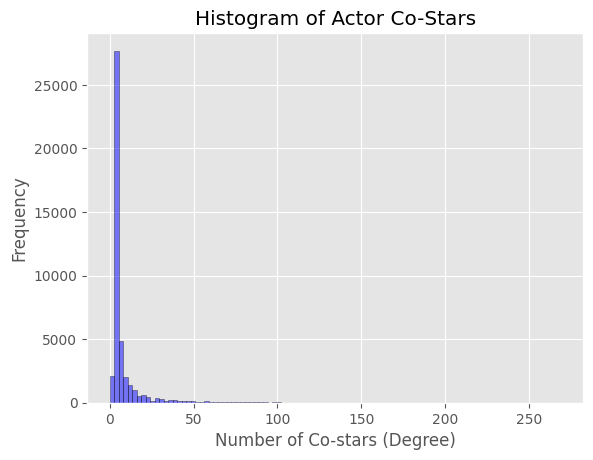

The median number of costars an actor has had is: 3.0


In [30]:
import statistics


def find_median_num_costars():
    # Get the degrees of all actors and calculate the median
    actor_degrees = [len(costars) for costars in actor_to_costars.values()]
    median_num_costars = statistics.median(actor_degrees)

    # Plotting the histogram of node degrees
    plt.hist(actor_degrees, bins=100, alpha=0.5, color='b', edgecolor='black')
    plt.xlabel('Number of Co-stars (Degree)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Actor Co-Stars')
    plt.grid(True)
    plt.show()

    return median_num_costars

median_num_costars = find_median_num_costars()
print(
    f"The median number of costars an actor has had is: {median_num_costars}")


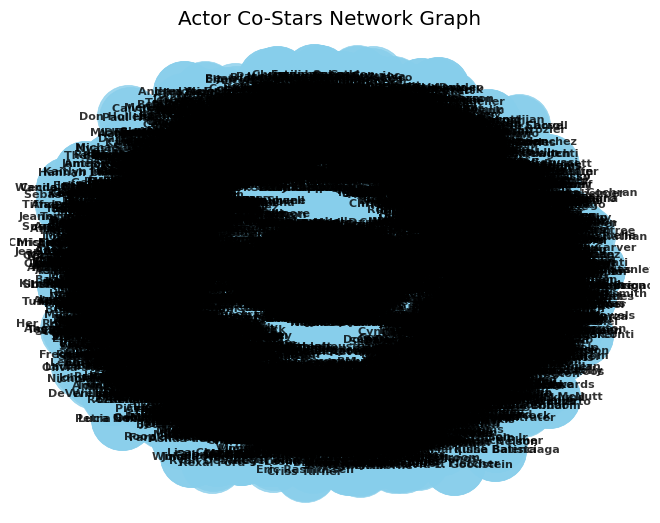

In [31]:
def create_actor_costar_graph(actor_to_costars):
    G = nx.Graph()

    for actor, costars in actor_to_costars.items():
        for costar in costars:
            G.add_edge(actor, costar)

    return G

# Create the graph from actor_to_costars
actor_costar_graph = create_actor_costar_graph(actor_to_costars)

# Plot the network graph
# Adjust layout for better visualization
pos = nx.spring_layout(actor_costar_graph, seed=42)
nx.draw(actor_costar_graph, pos, with_labels=True, node_size=2000,
        node_color='skyblue', font_size=8, font_weight='bold', alpha=0.8, edge_color='gray')
plt.title("Actor Co-Stars Network Graph")
plt.show()
